In [1]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random.seed(108)

Training images set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/major_project/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/road-sign-detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 96% 210M/218M [00:01<00:00, 156MB/s]
100% 218M/218M [00:01<00:00, 148MB/s]


In [4]:
!unzip /content/road-sign-detection.zip

Archive:  /content/road-sign-detection.zip
  inflating: annotations/road0.xml   
  inflating: annotations/road1.xml   
  inflating: annotations/road10.xml  
  inflating: annotations/road100.xml  
  inflating: annotations/road101.xml  
  inflating: annotations/road102.xml  
  inflating: annotations/road103.xml  
  inflating: annotations/road104.xml  
  inflating: annotations/road105.xml  
  inflating: annotations/road106.xml  
  inflating: annotations/road107.xml  
  inflating: annotations/road108.xml  
  inflating: annotations/road109.xml  
  inflating: annotations/road11.xml  
  inflating: annotations/road110.xml  
  inflating: annotations/road111.xml  
  inflating: annotations/road112.xml  
  inflating: annotations/road113.xml  
  inflating: annotations/road114.xml  
  inflating: annotations/road115.xml  
  inflating: annotations/road116.xml  
  inflating: annotations/road117.xml  
  inflating: annotations/road118.xml  
  inflating: annotations/road119.xml  
  inflating: annotations/

In [ ]:
!curl -L "https://public.roboflow.com/ds/ONxyYx8ddR?key=36n4EfSQY5" > roboflow.zip; 

In [28]:
!unzip roboflow.zip;

Streaming output truncated to the last 5000 lines.
 extracting: export/labels/1478900099595044482_jpg.rf.Y48Kh5UJNyBAWFTA0w0y.txt  
 extracting: export/labels/1478900100165707353_jpg.rf.02dae94790fe0a5fd8145e6582060381.txt  
 extracting: export/labels/1478900100165707353_jpg.rf.mLJlW3Cf3VoVKjXY6jgh.txt  
 extracting: export/labels/1478900100737478288_jpg.rf.2bb35a1222e15394de7033687f69065c.txt  
 extracting: export/labels/1478900100737478288_jpg.rf.nbrgBfnnhHP0mwGGKfnW.txt  
 extracting: export/labels/1478900101309115339_jpg.rf.2508668be11307c87ff954cf21544d10.txt  
 extracting: export/labels/1478900101309115339_jpg.rf.OsDb7MLdxcxdujSvvLyR.txt  
 extracting: export/labels/1478900101879688623_jpg.rf.81c3be06336e0ae02178f47713d58e6f.txt  
 extracting: export/labels/1478900101879688623_jpg.rf.v2nxcO0TVyrQn6VcGa1D.txt  
 extracting: export/labels/1478900102451943901_jpg.rf.4kwTUlpUEj4Jc9ubppWJ.txt  
 extracting: export/labels/1478900102451943901_jpg.rf.bb6b07a82d52b84fdcc5593bc581128c.txt 

In [29]:
imagesFolder = "/content/export/images/"
labelsFolder = "/content/export/labels/"

images = os.listdir(imagesFolder)
labels = os.listdir(labelsFolder)


print('total OLD images: ', len(images))
print('total OLD labels: ', len(labels))

total OLD images:  29800
total OLD labels:  29800


In [10]:
i = 222
labelPath = labelsFolder + os.listdir(labelsFolder)[i]
f = open(labelPath, "r")
txtFileContent = ""

for x in f:
  print(x)

1 0.1279296875 0.578125 0.1259765625 0.1064453125

1 0.2060546875 0.55859375 0.0576171875 0.080078125

1 0.24609375 0.548828125 0.03515625 0.05859375

1 0.2998046875 0.529296875 0.048828125 0.068359375

10 0.2998046875 0.52734375 0.044921875 0.068359375

1 0.341796875 0.5341796875 0.0341796875 0.03515625

1 0.4208984375 0.51953125 0.0263671875 0.0234375

0 0.4541015625 0.52734375 0.0126953125 0.0380859375

1 0.5322265625 0.5390625 0.0712890625 0.0751953125


In [30]:
n = 3
replacementStr = 'jpg'

for i in range(len(labels)):

    labelPath = labelsFolder + labels[i]
    f = open(labelPath, "r")
    txtFileContent = ""
    
    for x in f:
      if((x[0]=='1' or x[0] == '2' or x[0] ==  '4' or x[0] == '6' ) and (x[1] == ' ')):
        txtFileContent += x

    f.close()
    os.remove(labelPath)

    if(txtFileContent!=""):
        f = open(labelPath, "w")
        f.write(txtFileContent)
        f.close()
    else:
        # Replace last 3 characters in labels with 'jpg'

        pathToImageBeingRemoved = imagesFolder + labels[i][:-n] + replacementStr

        os.remove(pathToImageBeingRemoved)

In [55]:
i = 2082
labels = os.listdir(labelsFolder)
labelPath = labelsFolder + labels[i]
f = open(labelPath, "r")
txtFileContent = ""

for x in f:
  print(x)

1 0.048828125 0.595703125 0.09765625 0.0986328125

1 0.12890625 0.578125 0.0732421875 0.0771484375

1 0.1787109375 0.5654296875 0.0576171875 0.0654296875

1 0.244140625 0.55859375 0.0498046875 0.0537109375

1 0.3994140625 0.56640625 0.087890625 0.123046875

4 0.46484375 0.205078125 0.029296875 0.08984375

1 0.6416015625 0.546875 0.220703125 0.25

4 0.7080078125 0.3623046875 0.029296875 0.08203125


labels i  1478898038952597297_jpg.rf.53af2eb29be0e7a5deda5265ebb4236c.txt


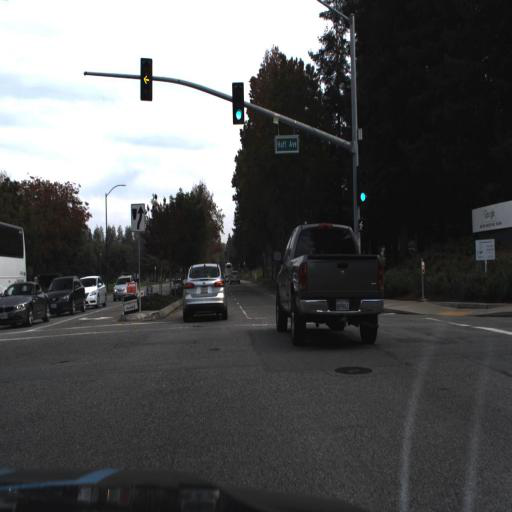

In [56]:
imgPath = imagesFolder + labels[i][:-n] + replacementStr
print('labels i ', labels[i])
img = Image.open(imagesFolder+labels[i][:-n] + replacementStr)
img

In [25]:
images = os.listdir(imagesFolder)
labels = os.listdir(labelsFolder)

print('total OLD images: ', len(images))
print('total OLD labels: ', len(labels))

total OLD images:  26104
total OLD labels:  26104


In [57]:
labels = os.listdir(labelsFolder)
noOfFilesToBeRemoved = 0
for i in range(len(labels)):
        
    classesInThisFile = []
    labelPath = labelsFolder + labels[i]
    f = open(labelPath, "r")

    for x in f:
        classesInThisFile.append(x[0])

    f.close()

    if  not(('4' in classesInThisFile) or ('2' in classesInThisFile) or ('6' in classesInThisFile)):
        noOfFilesToBeRemoved+=1
        
        pathToImageBeingRemoved = imagesFolder + labels[i][:-n] + replacementStr

        os.remove(pathToImageBeingRemoved)
        os.remove(labelPath)
print('files removed: ', noOfFilesToBeRemoved)

files removed:  0


In [58]:
!mkdir RoadSignsEdited
!mkdir RoadSignsEdited/images
!mkdir RoadSignsEdited/labels

In [59]:
import xml.etree.ElementTree as ET

In [60]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [61]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 5,
                           "stop": 0,
                           "speedlimit": 3,
                           "crosswalk": 1}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [62]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)

100%|██████████| 877/877 [00:00<00:00, 3985.61it/s]


In [63]:
#remove  crosswalk as we dont need these

PathToAnnotationsInTXT = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

PathToAnnotationsInXML = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]

for annotation in PathToAnnotationsInXML:
  os.remove(annotation)

pathToAnnotationsToBeRemoved = []
pathToImagesToBeRemoved = []

for annotation in PathToAnnotationsInTXT:
  f = open(annotation, "r")
  for x in f:
    if(x[0] == '1'):
      pathToAnnotationsToBeRemoved.append(annotation)
      pathToImagesToBeRemoved.append('/content/images/' + os.path.basename(annotation).replace('txt', 'png'))

print(len(pathToAnnotationsToBeRemoved))

for i in range(len(pathToImagesToBeRemoved)):
  
    os.remove(pathToImagesToBeRemoved[i])
    os.remove(pathToAnnotationsToBeRemoved[i])


200


In [64]:
imagesFolder = "/content/images"
images = os.listdir(imagesFolder)
labelsFolder = "/content/annotations"
labels = os.listdir(labelsFolder)

print('total OLD images: ', len(images))
print('total OLD labels: ', len(labels))

total OLD images:  707
total OLD labels:  707


In [65]:
def moveFilesFrom(sourceFolder, toDestFolder):
  imagesInSourceFolder = os.listdir(sourceFolder);
  for imageName in tqdm(imagesInSourceFolder):
    sourceFilePath = sourceFolder + imageName
    destFilePath = toDestFolder + imageName
    shutil.move(sourceFilePath, destFilePath)

In [66]:
sourceFolder = ["/content/images/", "/content/annotations/"]
toDestFolder = ["/content/export/images/", "/content/export/labels/"]
for i in range(len(sourceFolder)):
  moveFilesFrom(sourceFolder[i], toDestFolder[i])

100%|██████████| 707/707 [00:00<00:00, 27156.18it/s]


In [ ]:
os.path.basename('/sdfsf/sdfdsf/erer.txt')

'erer.txt'

In [67]:
# Read images and annotations

trainImagesPath = "/content/export/images/"
labelsPath = "/content/export/labels/"

images = [os.path.join(trainImagesPath, x) for x in os.listdir(trainImagesPath)]
annotations = [os.path.join(labelsPath, x) for x in os.listdir(labelsPath)]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.1, random_state = 1)
#val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [68]:
!mkdir train
!mkdir train/images train/labels
!mkdir train/images/train train/images/val train/labels/train train/labels/val

In [69]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            error  = 1

# Move the splits into their folders
move_files_to_folder(train_images, 'train/images/train')
move_files_to_folder(val_images, 'train/images/val/')
#move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'train/labels/train/')
move_files_to_folder(val_annotations, 'train/labels/val/')
#move_files_to_folder(test_annotations, 'annotations/test/')

In [71]:
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r /content/yolov5/requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15123, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 15123 (delta 42), reused 31 (delta 11), pack-reused 15045
Receiving objects: 100% (15123/15123), 14.13 MiB | 28.76 MiB/s, done.
Resolving deltas: 100% (10359/10359), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into a

In [70]:
imagesFolder = "/content/train/images/train"
images = os.listdir(imagesFolder)
labelsFolder = "/content/train/labels/train"
labels = os.listdir(labelsFolder)

print('total OLD images: ', len(images))
print('total OLD labels: ', len(labels))

total OLD images:  11970
total OLD labels:  11970


In [ ]:
!python /content/yolov5/train.py --img 480 --cfg /content/yolov5/models/yolov5n.yaml --hyp /content/yolov5/data/hyps/hyp.scratch-low.yaml --batch 64 --epochs 3 --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --data data.yaml  --workers 24

train: weights=/content/yolov5/runs/train/exp2/weights/best.pt, cfg=/content/yolov5/models/yolov5n.yaml, data=data.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=64, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-95-g416a132 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

In [ ]:
!python /content/yolov5/train.py --img 480 --cfg /content/yolov5/models/yolov5n.yaml --hyp /content/yolov5/data/hyps/hyp.scratch-low.yaml --batch 96 --epochs 10 --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --data data.yaml  --workers 24

train: weights=/content/yolov5/runs/train/exp2/weights/best.pt, cfg=/content/yolov5/models/yolov5n.yaml, data=data.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=96, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, ob